# import needed packages

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error
#from sklearn.pipeline import make_pipeline

# from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# read in data and seperate to train and test

In [2]:
# read in and prepare X_train, y_train and X_test data
X_train=pd.read_csv('MLProjectData.csv')
X_test=pd.read_csv('testData.csv',index_col=0)

y_train = X_train['target']
X_train.drop('target',axis=1,inplace=True)

In [3]:
# label to split the training and testing
X_train['train']=True
X_test['train']=False

In [4]:
temp=pd.get_dummies(X_train.append(X_test,sort=False))
X_train=temp[temp['train']==True].drop('train',axis=1)
X_test=temp[temp['train']==False].drop('train',axis=1)

## get data information

## train model

In [22]:
xgr = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
# xgr.fit(X_train, y_train)

In [23]:
from sklearn.metrics import r2_score

In [42]:
# A parameter grid for XGBoost
# params = {'min_child_weight':[4,5],
#           'gamma':[i/10.0 for i in range(3,6)],
#           'subsample':[i/10.0 for i in range(6,11)],
#           'colsample_bytree':[i/10.0 for i in range(6,11)],
#           'max_depth': [2,3,4],
#           'gpu_id':[0],
#           'max_bin':[16],
#           'tree_method':['gpu_hist'],
#          'cv':[3]}

params = {'gpu_id':[0],
          'tree_method':['gpu_exact'],
          'n_estimators':[10,30,50,100,300,500,1000,2000,3000],
          'learning_rate':[0.001,0.01,0.03, 0.05,0.08, 0.1,0.3,0.5,0.7],
          'max_depth':[2,3,4]
         }


# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)

# Print the r2 score
print(r2_score(y_train, grid.best_estimator_.predict(X_train))) 

# Save the file
# y_test = grid.best_estimator_.predict(x_test)
# results_df = pd.DataFrame(data={'y':y_test}) 
# ids = test_df["ID"]
# joined = pd.DataFrame(ids).join(results_df)
# joined.to_csv("mercedes.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.10545506348483091


In [43]:
print(r2_score(y_train, grid.best_estimator_.predict(X_train))) 

0.10545506348483091


In [45]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, gpu_id=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_exact')

Best Estimator 1

r2_score: 0.10044651984945663

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, cv=3, gamma=0, gpu_id=0, importance_type='gain',
       learning_rate=0.05, max_bin=16, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_exact')
       

{'cv': 3,
 'gpu_id': 0,
 'learning_rate': 0.05,
 'max_bin': 16,
 'max_depth': 2,
 'n_estimators': 100,
 'tree_method': 'gpu_exact'}

Best Estimator 2

0.10545506348483091

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, gpu_id=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_exact')
       
       
{'gpu_id': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 50,
 'tree_method': 'gpu_exact'}

In [46]:
grid.best_params_

{'gpu_id': 0,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 50,
 'tree_method': 'gpu_exact'}

In [35]:
grid.best_score_

-0.015414561837484384

In [50]:
validate = grid.best_estimator_.predict(X_train)

In [51]:
print("Mean Absolute Error : " + str(mean_absolute_error(validate, y_train)))

Mean Absolute Error : 0.9385677555952898


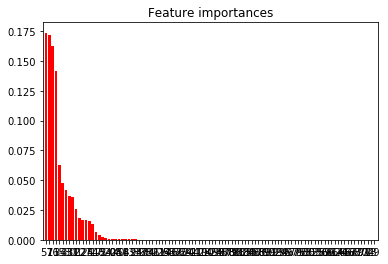

In [54]:
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# subsetting for fun

In [56]:
X_1, X_2, y_1, y_2 = train_test_split(X_train, y_train, test_size=0.5,random_state=42)

In [58]:
y_p1 = grid.best_estimator_.predict(X_1)
r2_score(y_1,y_p1)

0.11690095728350869

In [61]:
y_p2 = grid.best_estimator_.predict(X_2)
r2_score(y_2,y_p2)

0.09231471172934202